## 1. Penghargaan Hadiah Nobel
<p><img style="float: left;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
Hadiah Nobel merupakan penghargaan ilmiah yang terkenal di dunia. Selain mendapatkan kehormatan, penghargaan, dan sejumlah uang, si penerima penghargaan ini juga akan mendapatkan medali emas yang seolah olah menunjukkan bahwa medali tersebut diberikan oleh Alfred Nobel. Penghargaan tersebut diberikan kepada ilmuwan dan cendekiawan dalam kategori kimia, sastra, fisika, fisiologi atau kedokteran, ekonomi. Penghargaan pertama Nobel diberikan pada tahun 1901, dan pada waktu itu penghargaan masih fokus diberikan kepada laki-laki. Tetapi saat ini sudah tidak lagi memandang gender dalam hal pemberian hadiah Nobel ini. Nah sekarang marilah kita mencari tahu...

Berikut ini diberikan sebuah dataset yang menerima nobel dari tahun 1901 sampai tahun 2016

In [1]:
# import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import numpy as np

# membaca dataset
nobel = pd.read_csv('datasets/nobel.csv')

# menampilkan 6 baris pertama dari dataset
nobel.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


## 2. Jadi siapa yang mendapatkan hadiah Nobel?
Hanya melihat dari beberapa 6 data yang ditampilkan diatas, kita sudah melihat nama Wilhelm Conrad Röntgen, pria yang menemukan sinar-X. Kita juga dapat melihat pemenang pada tahun 1901 adalah orang-orang yang berasal dari Eropa. Kemudian kita akan melihat negara mana yang paling sering memenangkan penghargaan ini dan jenis kelamin apa yang sering mendapatkannya?

(catatan: Untuk mendapatkan negara yang sering memenangkan penghargaan adalah dengan melihat kolom birth_country, karena kolom organization_country kebanyakan masih berisi NaN.

In [2]:
# Menampilkan jumlah pemenang penghargaan Nobel dari tahun 1901 sampai tahun 2016
display(len(nobel))

# Menampilkan jenis kelamin yang sering menerima penghargaan Nobel
display(nobel.sex.value_counts())

# Menampilkan negara yang paling sering mendapatkan penghargaan Nobel
nobel.birth_country.value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

## 3. Dominasi USA
Dapat dilihat dari hasil diatas bahwa orang yang berasal negara USA sangat mendominasi dalam hal meraih penghargaan Nobel tersebut. Namun dapat dilihat bahwa untuk awal-awal tahun 1901 negara yang berasal dari Eropa lah yang mendominasi. Sekarang kita akan mencari tahu, kapan USA mulai mendominasi dalam hal meraih penghargaan ini? 

(catatan: disini kita akan mencari rata-rata penghargaan USA per 1 decade(10 tahun).)

In [6]:
# Menghitung rata-rata orang dari USA yang memenangkan hadiah Nobel tersebut
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# menampilkan hasil rata-rata seseorang dari negara USA yang memenangkan Nobel per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


## 4. Memvisualisasikan Dominasi USA

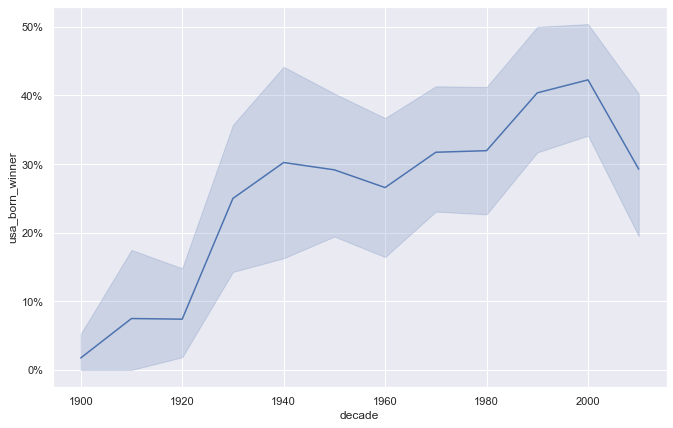

In [4]:
# mengatur tema 
sns.set()
# mengatur ukuran plot 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# plot dominasi USA 
ax = sns.lineplot(x='decade', y='usa_born_winner', data = nobel)

# menambahkan %-formatting ke dalam y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))


## 5. Membandingkan banyak nya wanita dan pria yang memenangkan hadiah Nobel
Kita akan mencoba membandingkan penerima Nobel wanita dan pria dalam setiap category untuk melihat apakah wanita dominan di suatu category atau tidak. Karena yang kita tahu bahwa dalam hal penerimaan hadiah Nobel ini, pria mendapatkan total penghargaan lebih banyak daripada wanita.

In [41]:
# menghitung rata-rata penghargaan laki-laki dan perempuansn per decade
nobel['female'] = nobel['sex'] =='Female'
nobel['male'] =nobel['sex'] == 'Male'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female'].mean()
display(prop_female_winners.tail(5))

prop_male_winners =nobel.groupby(['decade', 'category'], as_index=False)['male'].mean()
display(prop_male_winners.tail(5))

,decade,category,female
61,2010,Economics,0.000000
62,2010,Literature,0.285714
63,2010,Medicine,0.125000
64,2010,Peace,0.400000
65,2010,Physics,0.000000


,decade,category,male
61,2010,Economics,1.000000
62,2010,Literature,0.714286
63,2010,Medicine,0.875000
64,2010,Peace,0.300000
65,2010,Physics,1.000000


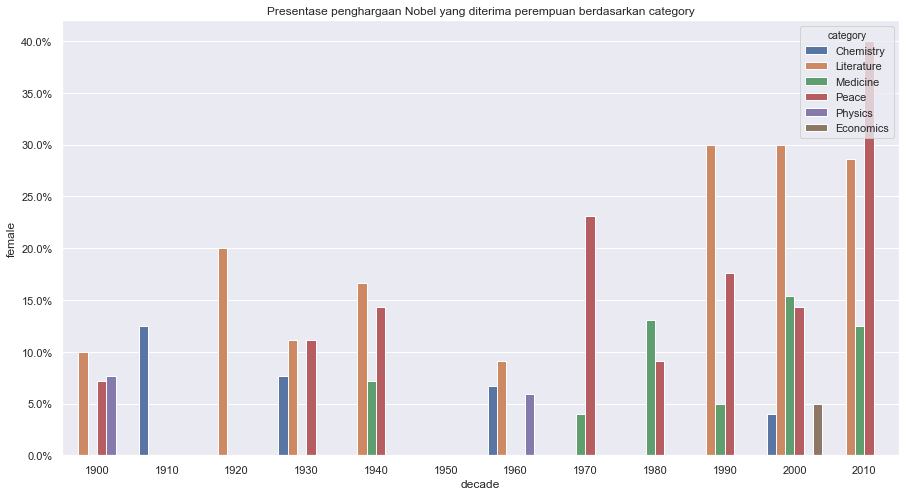

In [48]:
fig,ax = plt.subplots(figsize=(15,8))

ax = sns.barplot(x='decade', y='female', hue='category', data=prop_female_winners)

# menambahkan %-formatting ke dalam y-axis
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Presentase penghargaan Nobel yang diterima perempuan berdasarkan category')
plt.show()

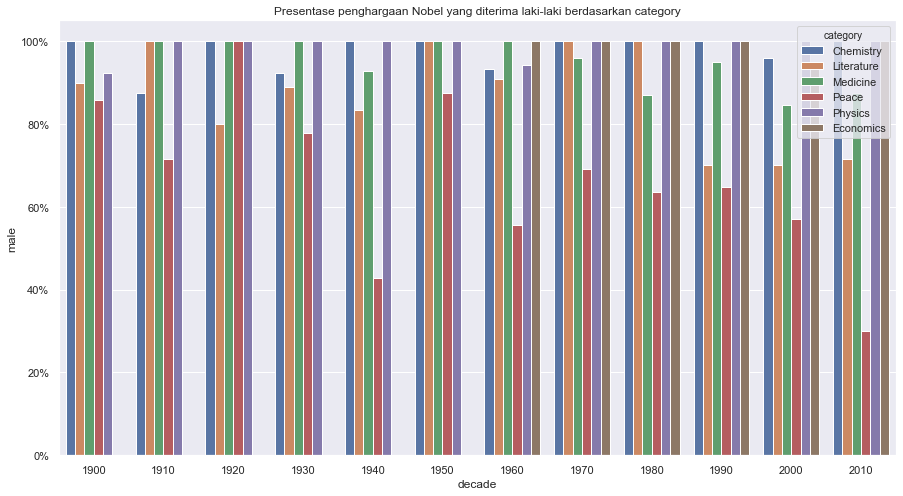

In [73]:
fig,ax = plt.subplots(figsize=(15,8))

ax = sns.barplot(x='decade', y='male', hue='category', data=prop_male_winners)
# menambahkan %-formatting ke dalam y-axis
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.title('Presentase penghargaan Nobel yang diterima laki-laki berdasarkan category')
plt.show()

## 6. Wanita pertama yang memenangkan Nobel
Berdasarkan grafik diatas, untuk grafik yang wanita cukup berantakan, tidak ada tren positif yang cukup signifikan yang terjadi pada tahun 1900-2016. Sekarang kita akan mencari tahu wanita pertama yang memenangkan penghargaan Nobel ini dan dikategori apa dia memenangkannya

In [49]:
nobel[nobel['sex']=='Female'].nsmallest(n = 1, columns='decade')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,male,female
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True,False,True


## 7. Mencari Pemenang yang berhasil memenangkan Nobel lebih dari 1

In [53]:
nobel.groupby('full_name').filter(lambda prize:len(prize)>=2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,male,female
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True,False,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Paris,France,1934-07-04,Sallanches,France,False,1910,True,False,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,1910,False,False,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,1940,False,False,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False,True,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,1950,False,False,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False,True,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False,True,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False,True,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,1960,False,False,False


## 8. Mencari tahu umur para penerima hadiah Nobel

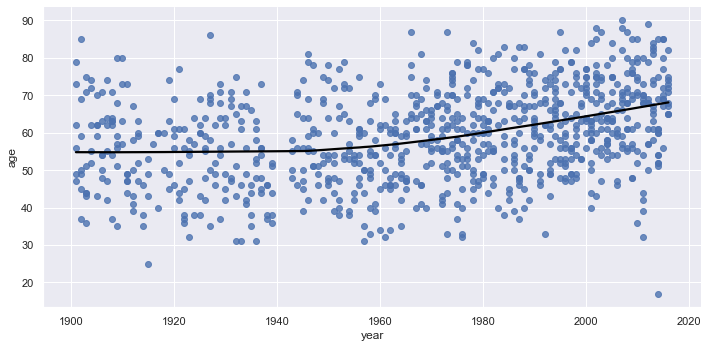

In [71]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'],  infer_datetime_format=True)

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year


# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=nobel, lowess=True, aspect=2, line_kws={'color':'black'})
plt.show()

In [70]:
print('Berikut adalah rata-rata umur pemenang Nobel setiap dekade')
hasil = nobel.groupby('decade', as_index=False)['age'].mean()
pd.DataFrame(hasil)

Berikut adalah rata-rata umur pemenang Nobel setiap dekade


,decade,age
0,1900,57.839286
1,1910,52.842105
2,1920,54.981481
3,1930,51.618182
4,1940,58.025000
5,1950,54.323944
6,1960,56.506667
7,1970,59.388350
8,1980,60.542553
9,1990,62.138614


Sebelumnaya dapat dilihat dari grafik dan data diatas pada awal penerimaan Nobel hingga pada tahun 1970 an cenderung usianya masih berkisar di angka 50-60 tahun sedangkan pada tahun diatas 1970 didapatkan penerima Nobel memiliki usia rata-rata lebih dari 60 tahun. Selain itu juga dapat dilihat pada tahun 1940-1943 itu tidak terdapat seseorang pun yang menerima hadiah Nobel. Mungkin pada tahun tersebut bertepatan juga dengan perang Dunia Kedua.


## 9. Perbedaan umur berdasarkan perbedaan category
Mari kita lihat tren usia dari berbagai kategori

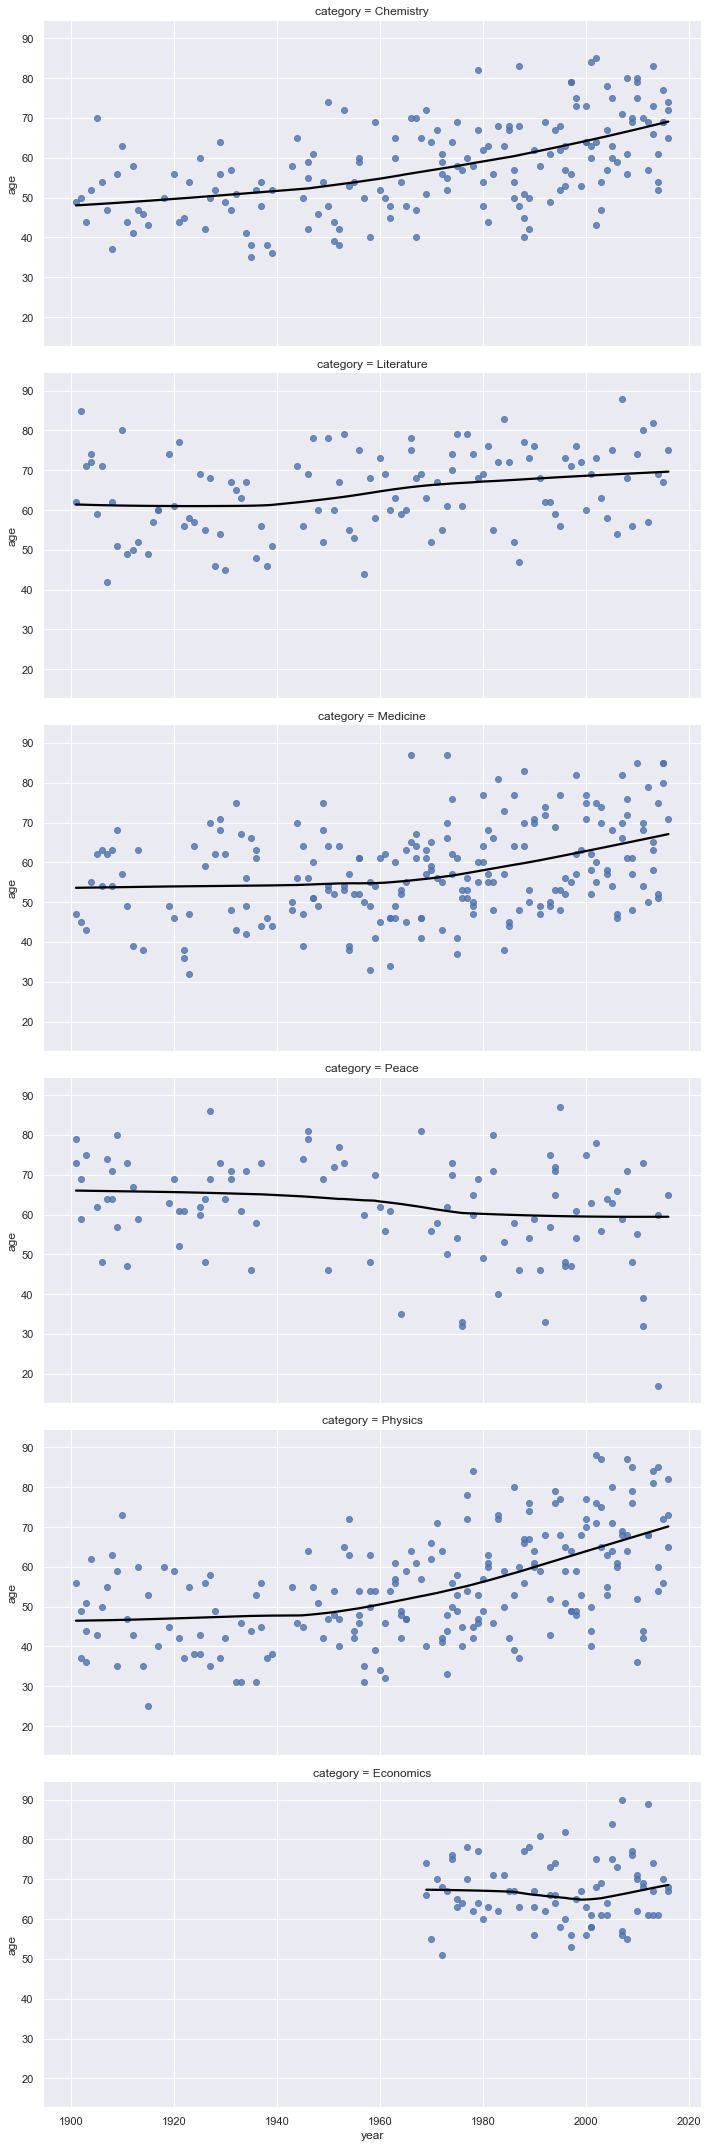

In [74]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x='year', y='age', row='category', data=nobel, lowess=True, 
           aspect=2, line_kws={'color':'black'})

Untuk category chemistry didapatkan trennya naik, hal ini menandakan bahwa penerima nobel pada kategori ini pada tahun ke tahun semakin tua yang menerimanya. Hal tersebut juga terjadi pada kategori Fisika dan Medicine. Pada kategori fisika didapatkan tren positif yang cukup signifikan. Dapat dilihat bahwa dulu pemenang nobel fisika berkisar di usia 50 an, namun lambat laun didapatkan bahwa usia orang yang memenangkan nobel kategori fisika berkisar di usia hampir 70 an. Lalu untuk category literature dan ekonomi cukup stabil. Sedangkan tren untuk kategori peace semakin turun menandakan bahwa banyak penerima nobel pada kategori peace semakin kesini semakin muda usianya.

## 10. Mencari pemenang Termuda dan Tertua

In [75]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(n=1 , columns='age'))
# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(n = 1, columns='age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,male,female,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,True,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,male,female,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,False,2010,True,False,True,17.0
